# Overview
Well, I'm going to [CodeMash 2018](http://www.codemash.org/).  I want to be prepared, so I want to have some idea of the sessions I'd like to attend ahead of time.  Unfortunately, their [Schedule page](http://www.codemash.org/schedule/) is just one, long vertical scroll and they have no nice spreadsheet download to show me what sessions are occurring in what rooms at what time and what choices I'll have to make.  So, I'm going to have to make my own spreadsheet.  No worries!  The [CodeMash API](https://github.com/argodev/codemash-speakers/blob/master/api/README.md) plus [pandas](https://pandas.pydata.org/) can do the trick.

# Step 1: Import the packages I need

In [51]:
import requests
import json
import pandas as pd
import numpy as np
from datetime import datetime
import itertools, collections
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')

# Step 2: Call the API and Setup my Dataframe

In [52]:
r = requests.get(url='https://speakers.codemash.org/api/SessionsData')
df_codemash = pd.DataFrame(r.json())

# write the json to disk just in case i ever need to work with it offline
json.dump(r.json(), open('SessionsData.json', 'w'))

# Step 3: Examine the data

In [29]:
# what kind of data is available from the API, anyway?
df_codemash.head()

,Abstract,Category,Id,Room,Rooms,SessionEndTime,SessionStartTime,SessionTime,SessionType,Speakers,Tags,Title
0,Many project teams use Slack as a means of com...,DevOps,7740,None,[Cypress],2018-01-09T12:00:00,2018-01-09T08:00:00,0001-01-01T00:00:00,Pre-Compiler,[{'Id': '1434dfae-bc8d-4238-b34c-2afb3edab4b3'...,[.NET],Build a Natural Language Slack Bot for your De...
1,Many developers are turning to Electron.js to ...,Web/Front-End,7147,None,[Nile],2018-01-09T12:00:00,2018-01-09T08:00:00,0001-01-01T00:00:00,Pre-Compiler,[{'Id': '6ae477dc-60fc-4e91-9b11-8c2bebca4885'...,[JavaScript],Build Cross-Platform Desktop Apps with Electron
2,"You've done a ""build your first mobile app"" pr...",Mobile,6971,None,[Orange],2018-01-09T12:00:00,2018-01-09T08:00:00,0001-01-01T00:00:00,Pre-Compiler,[{'Id': '4dfce7da-8421-430e-b296-6f8fd49f1f06'...,[Mobile],Build Your Second Mobile App
3,Your website works great with a handful of use...,Architecture,7567,None,[Mangrove],2018-01-09T12:00:00,2018-01-09T08:00:00,0001-01-01T00:00:00,Pre-Compiler,[{'Id': 'deebaaf7-41b1-4b85-a9b8-53f5dac3a628'...,[Testing],Devour the Cloud with Locust Swarms - Hands on...
4,Developing software is costly. It is made more...,Software Quality,7017,None,[Salon D],2018-01-09T12:00:00,2018-01-09T08:00:00,0001-01-01T00:00:00,Pre-Compiler,[{'Id': '45c35283-c08f-4ac1-8bfb-ab7d465abf34'...,"[Testing, Other]",Effective Gherkin: Quality Requirements for th...


In [30]:
print(df_codemash.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 12 columns):
Abstract            285 non-null object
Category            285 non-null object
Id                  285 non-null int64
Room                0 non-null object
Rooms               285 non-null object
SessionEndTime      285 non-null object
SessionStartTime    285 non-null object
SessionTime         285 non-null object
SessionType         285 non-null object
Speakers            285 non-null object
Tags                285 non-null object
Title               285 non-null object
dtypes: int64(1), object(11)
memory usage: 26.8+ KB
None


# Step 4: Ok, now get to my real purpose: transforming the session data into a format that will let me figure out which sessions I should attend

In [72]:
# since i'm only going to the two-day conference portion, i want to filter the sessions by the start date.
# to do so, i have to first transform the SessionStartTime value from string to date
df_codemash['SessionStartTime_date'] = df_codemash.SessionStartTime.map(lambda s: datetime.strptime(s, '%Y-%m-%dT%H:%M:%S'))

# what's up with putting a session's room name in a list?  i can't work with that, so i'll create a room_name column
df_codemash['room_name'] = df_codemash.Rooms.map(lambda r: r[0])

columns_for_pivot = ['SessionStartTime_date', 'room_name', 'Title']
# filter on just the last two days of the conference, since that's what i'm attending.  also, as cool as some of those
# KidzMash sessions look, let's filter them out, too
df_conf_sessions = df_codemash[(df_codemash.SessionStartTime_date > '2018-01-11') & 
                               np.logical_not(df_codemash.Title.str.contains('KidzMash'))][columns_for_pivot]

# now pivot the dataframe so i can see all my session choices per time block on one line
df_for_spread = df_conf_sessions.pivot(columns='room_name', values='Title', index='SessionStartTime_date')

# save the dataframe to Excel for my manual selection process
df_for_spread.to_excel('codemash_2018_sessions.xlsx')

df_for_spread.head()

room_name,Aloeswood,Booth B6,Cypress,Guava,Indigo Bay,Mangrove,Nile,Orange,Portia,Rosewood,Sagewood,Salon A,Salon D,Salon E,Salon H,Suite 1,Zambezi
SessionStartTime_date,,,,,,,,,,,,,,,,,
2018-01-11 08:00:00,AWS Security Essentials,None,Introduction to React + Redux + Redux Observables,None,Take the Toxic Out of Your Team and Up the Eff...,Accessibilty in Android,SQL Server on Linux? Wait ... What?,Fast Neural Networks… a no brainer!,Jewelbots: How to Get More Girls Coding!,Avoiding the Lock-In Fallacy,Real time traffic visualization in a microserv...,Next Evolution of Unit Testing: JUnit 5,Exploring a NoSQL Option for Storing Data in y...,"Restful Services with the Play Framework, MySQ...","Crimson and Clover, Over and Over (and Over). ...",None,Unbreakable. Perfect: The Craft of Code
2018-01-11 09:15:00,Crypto for Developers: Making Sane Choices,None,Building Holographic & VR Experiences with the...,None,Most Useful Design Patterns,Maturing the Enterprise Quality Practice,Getting Started with Deep Learning,Build a Delightful API with Serverless Technology,EventBus and MVP - The Chocolate and Peanut Bu...,None,How to get started with robotics and IoT at home,None,Devops Zen: Injecting Automated Tests into Inf...,"Dev Thumbs, QA Thumbs and the End of ""Ready fo...",Chatbot Stories: Real projects from the front ...,None,10 Insane Tips You Can Use Today to JavaScript...
2018-01-11 10:30:00,Automating Security Testing with the OWTF,None,Super Mario UX Designer,None,Decoupling the Frontend through Modular CSS,Build your own Voice Assistant,Intro to Blockchain: What Is This For and Why ...,"Clean Architecture: Patterns, Practices, and P...",Java EE 8! Now what?,How Pro Wrestling Helped Make Me a World Champ...,Imposter Syndrome: Overcoming Self-Doubt in Su...,"Caring for New Users: Adoption, Onboarding, Pe...",Writing Code Like a Poet,Automation Trepidation: Does DevOps freak you ...,Designers and Developers Working Together - Ma...,None,Avoiding Microservice Megadisasters
2018-01-11 11:45:00,Securing Your API Endpoints,None,Refactoring a Legacy Application with ReactJS,None,Getting OAuth Into Your Dev Toolbox,One Million Little Gophers: Building a Concurr...,"The Science of Great UI, part 1 (Efficiency in...",Press Start: Game Development for the Uninitia...,Making Accessibility Testing Suck Less: An Int...,Services Assemble! Apply MVP Principles to Cre...,A Research Study into DevOps bottlenecks,Coding Naked – Unit testing those hard to reac...,Essential Tools for Xamarin Developers!,Project Vienna: Machine Learning Process For E...,"Machine Learning at Scale, How to Keep Learnin...",None,"Becoming a Servant Leader, Leading from the Tr..."
2018-01-11 13:00:00,"Secure Applications, By Design",None,A Brief Introduction to Concurrent Programming,None,Putting the Visual into the Visual Studio Debu...,Teaching kids how to code with Sphero robotics,Writing Scalable JavaScript at Cox,Hacking healthcare: real-world applications an...,Command and Conquer the Front End with Elm,Walking the High Wire: Patching Erlang Live,Custom Middleware & Microservices with ASP.NET...,Start a UX Revolution at Your Workplace,"Brain-inspired computing: the truth, the ficti...",Bluetooth Low Energy on Android: Top Tips for ...,Fearing the Robot Overlords,None,Zero to DevOps in Under an Hour with Kubernetes


# So, I've accomplished my main objective of transforming the CodeMash session data into a form I can more easily utilized, but while I'm here, let me look at the data a little

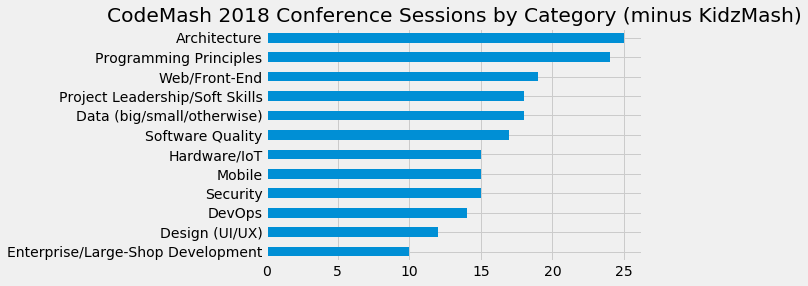

In [83]:
title = 'CodeMash 2018 Conference Sessions by Category (minus KidzMash)'
df_adult_sessions = df_codemash[(df_codemash.SessionStartTime_date > '2018-01-11') & 
                                np.logical_not(df_codemash.Title.str.contains('KidzMash'))]
df_adult_sessions.Category.value_counts().sort_values().plot.barh(title=title)

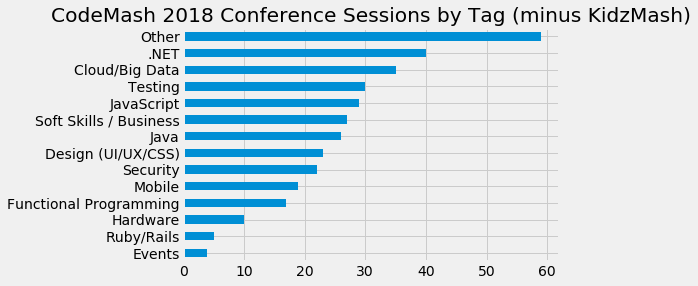

In [105]:
title = 'CodeMash 2018 Conference Sessions by Tag (minus KidzMash)'
tags = df_adult_sessions.Tags.tolist()
tags_counter = collections.Counter(itertools.chain(*tags))

pd.DataFrame.from_dict(tags_counter, orient='index').rename(columns={0: 'Count'}).Count.sort_values().plot.barh(title=title)

### Seems like a liberal use of the "Other" tag.  Maybe I should spend some time analyzing the sessions tagged as "Other" to see if I could recommend a more descriptive tag.

### What else can I do?  Maybe some NLP analysis on session titles and descriptions?  Maybe some analysis on the Pre-Compiler sessions to determine if they're worth the extra money and time off from work?  Well, I'll have to do that work some other day as time is short.